# PROBLEM STATEMENT
A retail company needs to know when to store, what to store and the quantities to store in inventory.
As a Data scientist, you've been tasked with the responsibility of predicting the set of products the
company should store in its inventory for November 2011 sales with their corresponding quantities
based on historical sales. The dataset attached contains the company sales data from December
2009 to October 2011.
Dataset
● InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each
transaction. If this code starts with the letter 'c', it indicates a cancellation.
● StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to
each distinct product.
● Description: Product (item) name. Nominal.
● Quantity: The quantities of each product (item) per transaction. Numeric.
● InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was
generated.
● UnitPrice: Unit price. Numeric. Product price per unit.
● CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned t

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# load in the data

data = pd.read_csv("train.csv")

In [3]:
# read first five data

data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,"6,95",13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,"6,75",13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,"6,75",13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,"2,1",13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,"1,25",13085.0,United Kingdom


In [4]:
# check the columns 

data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [5]:
# check the rows and columns

data.shape

(957134, 8)

In [6]:
# check the datatype of the data

data.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price           object
Customer ID    float64
Country         object
dtype: object

In [7]:
# drop null data

data = data.dropna()

In [8]:
# remove the strings from Stock Column
data["StockCode"] = data["StockCode"].str.replace("[ABCDEFGHIJKLMNOPQRSTUVWXYZ]","")
data['StockCode'] = pd.to_numeric(data['StockCode'], errors='coerce')
data["StockCode"]=data["StockCode"].astype("float64")

/var/folders/4g/1rtpcg7s7jd0t1rlzzd5xbz00000gn/T/ipykernel_25094/2608909877.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data["StockCode"] = data["StockCode"].str.replace("[ABCDEFGHIJKLMNOPQRSTUVWXYZ]","")


In [9]:
# drop rows where stockcode is null

data.dropna(subset = ["StockCode"],inplace = True)
data["StockCode"]=data["StockCode"].astype("int64")

In [10]:
#label encoding was done for countries, they were binned into continent first then encoded

def label_states (data):
    if data['Country'] in ['SA',"Nigeria"]:
        return "Africa"
    if data['Country'] in ["Japan","Korea", "bahrain", "Lebanon", "Saudi Arabia", "Singapore", "Thailand", "United Arab Emirates", "Israel"]:
        return "Asia"
    if data['Country'] in ["Malta","austria","belgium","Channel Islands","Cyprus","Czech Republic", "Denmark","EIRE","European Community","Finland","France","unspecified","Germany", "Greece","Iceland","Italy","Lithuania","Norway","Poland","Portugal","Switzerland","United Kingdom","Netherlands","Spain", "Sweden"]:
        return "Europe"
    if data['Country'] in ["canada","West Indes","USA"]:
        return "North America"
    if data['Country'] in ["brazil"]:
        return  "south america"
    return 'Others'

data['Continent'] = data.apply(lambda data: label_states(data), axis=1)
data['Continent'].replace({'Africa':0, 'Asia':1,'Europe':2, 'North America':3,'south america':4,'Others':5}, inplace=True)


In [11]:
#  this was done to check customers buying patterns across continent

data.groupby(['Continent'])['StockCode'].nunique()

Continent
0      29
1     943
2    3850
3     253
5    1629
Name: StockCode, dtype: int64

In [12]:
#Quantity of Items Sold Per Continent

def total_sales_per_continent(data):
    sales_by_continent = data.groupby('Continent')['Quantity'].sum().reset_index()
    
    fig, ax = plt.subplots(figsize=(10,6))
    sns.barplot(sales_by_continent.Continent, sales_by_continent.Continent, order=sales_by_continent.sort_values('Quantity',ascending = False).Continent)
          
    ax.set(xlabel = "Continent", ylabel = "Sum of Quantity Sold", title = "Total Sales Per Continent")
    plt.xticks(fontsize=12, rotation=45)
       
    return sales_by_continent

/Users/mutiubusari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Continent,Quantity
0,0,102
1,1,49064
2,2,9153765
3,3,3287
4,5,152400


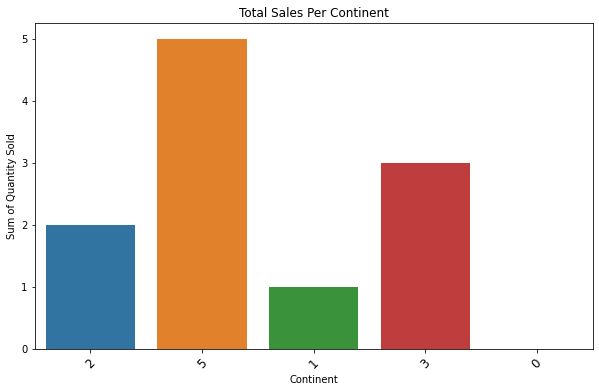

In [13]:
total_sales_per_continent(data)


In [14]:
# Sales Data Per Item

def total_sales_per_item(data):
    sales_by_store = data.groupby('StockCode')['Quantity'].sum().reset_index()
    
    fig, ax = plt.subplots(figsize=(20,8))
    sns.barplot(sales_by_store.StockCode, sales_by_store.Quantity, order=sales_by_store.sort_values('Quantity', ascending = False).StockCode)
    
    ax.set(xlabel = "StockCode", ylabel = "Quantity Sold", title = "Total Quantity Sold Per Stock ID")
    plt.xticks(fontsize=12, rotation=90)
    
    return

/Users/mutiubusari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


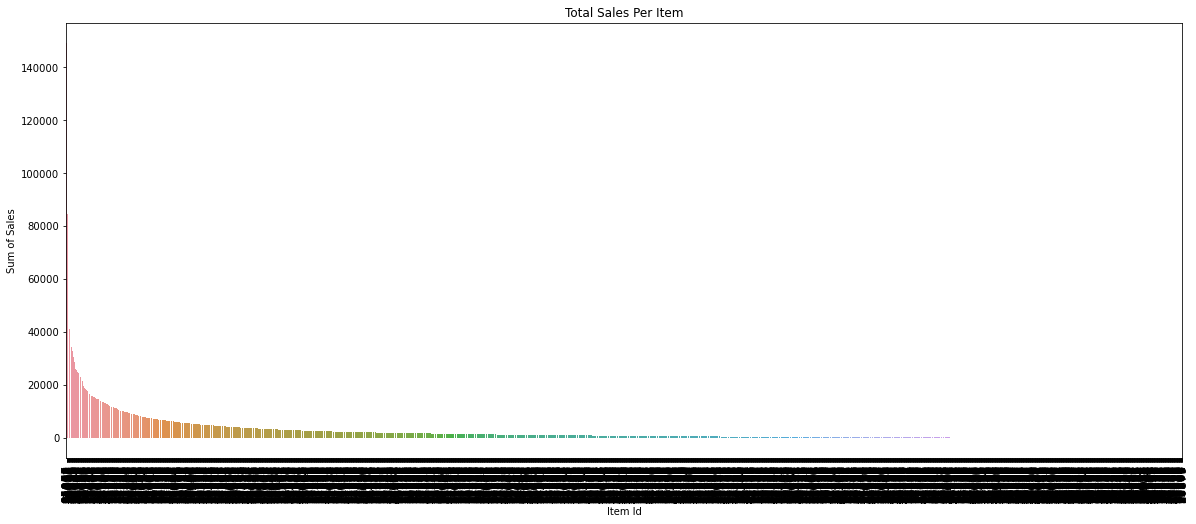

In [15]:
total_sales_per_item(data)


In [17]:
# grouping of continent and stockcode per quantity to get insights

item_sales_per_continent = data.groupby(['Continent', 'StockCode'])['Quantity'].sum()
item_sales_per_continent

Continent  StockCode
0          16156        25
           20749         1
           20750         1
           21034         1
           21108         1
                        ..
5          90059         6
           90098         4
           90120         4
           90145         2
           90164         2
Name: Quantity, Length: 6704, dtype: int64

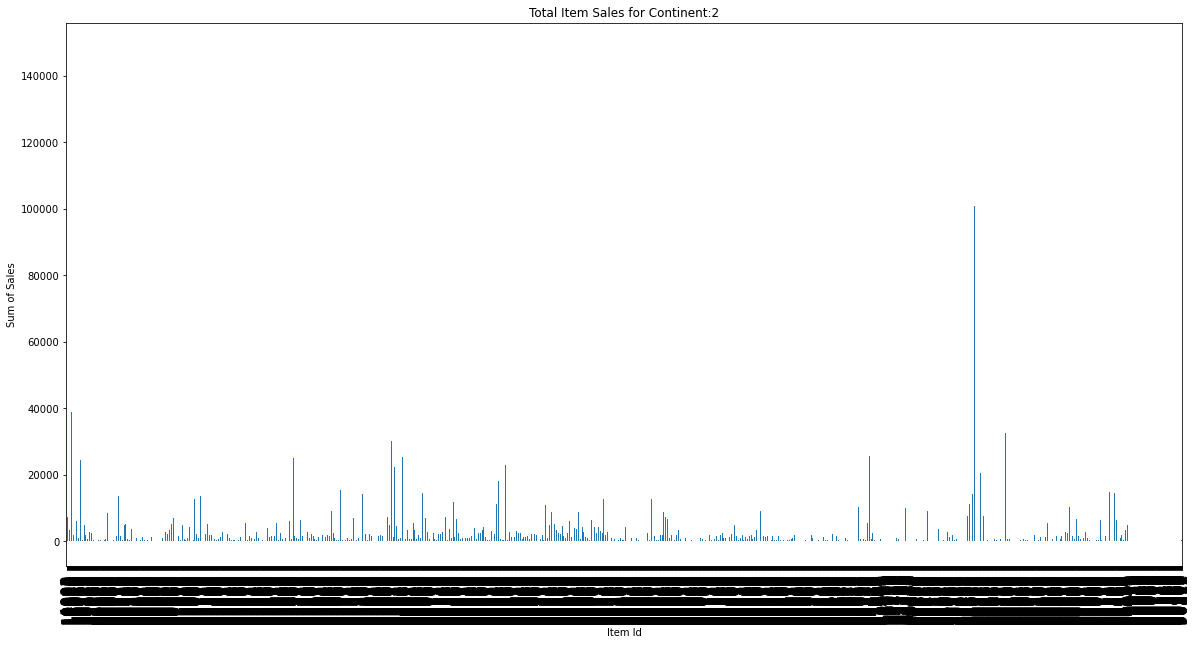

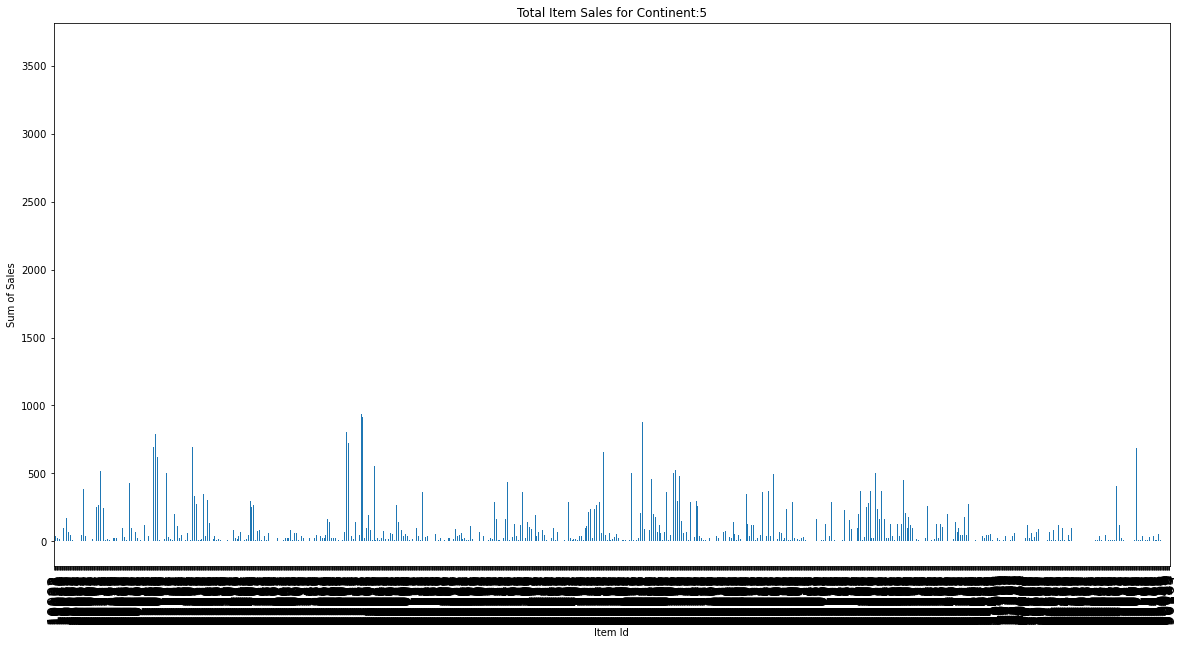

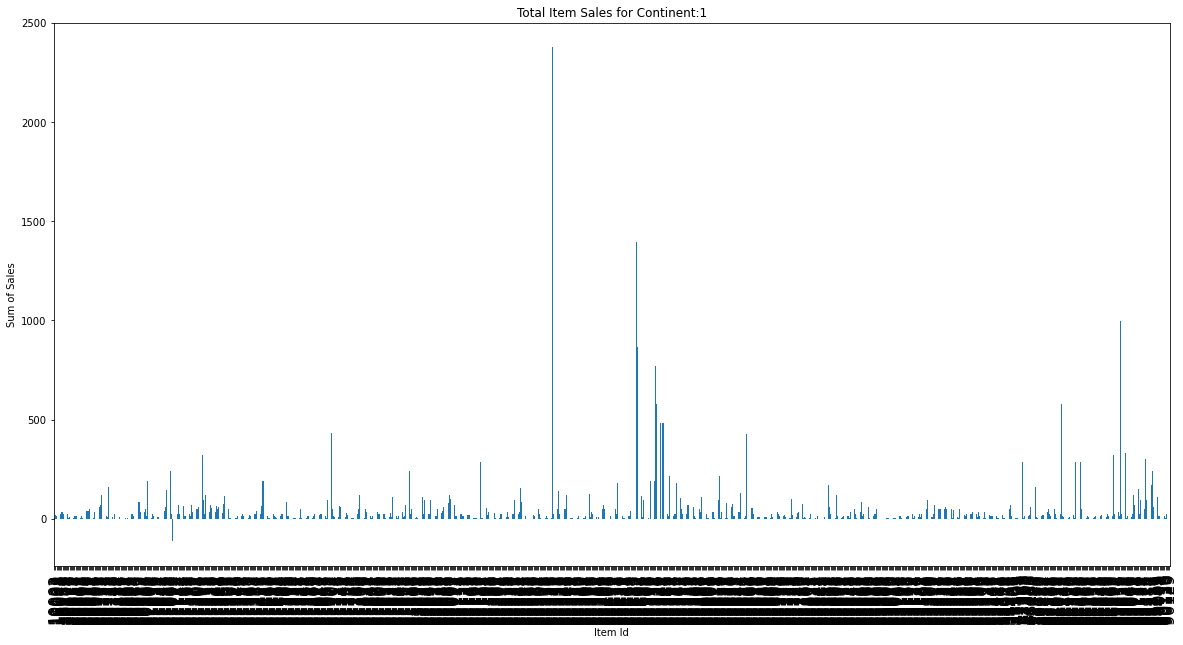

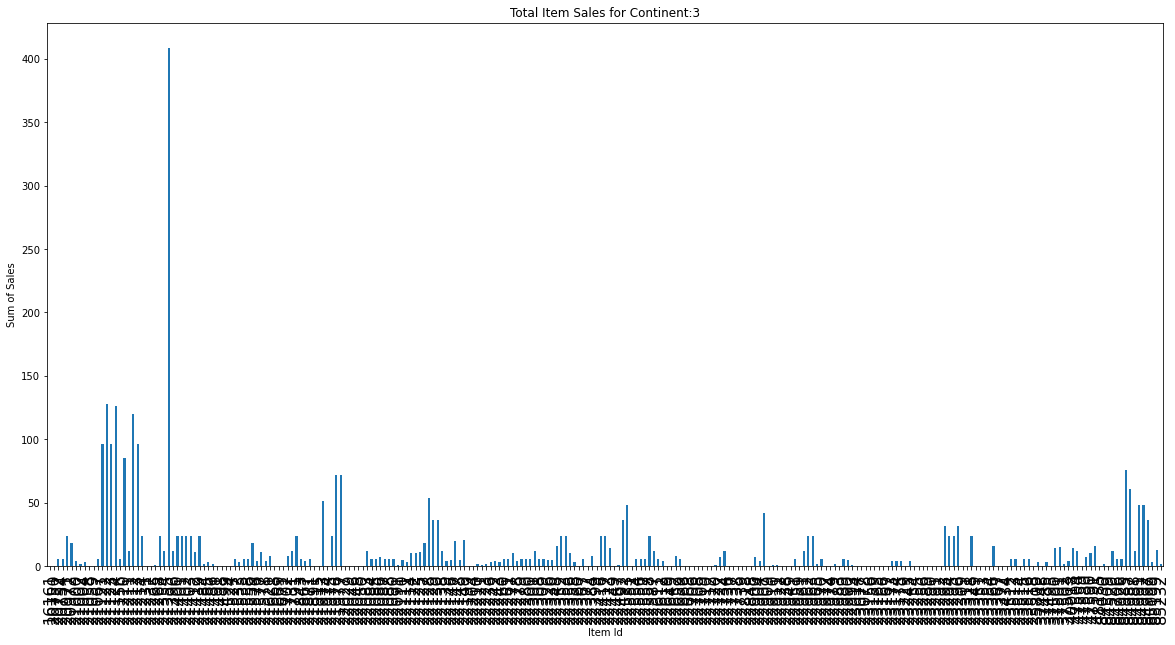

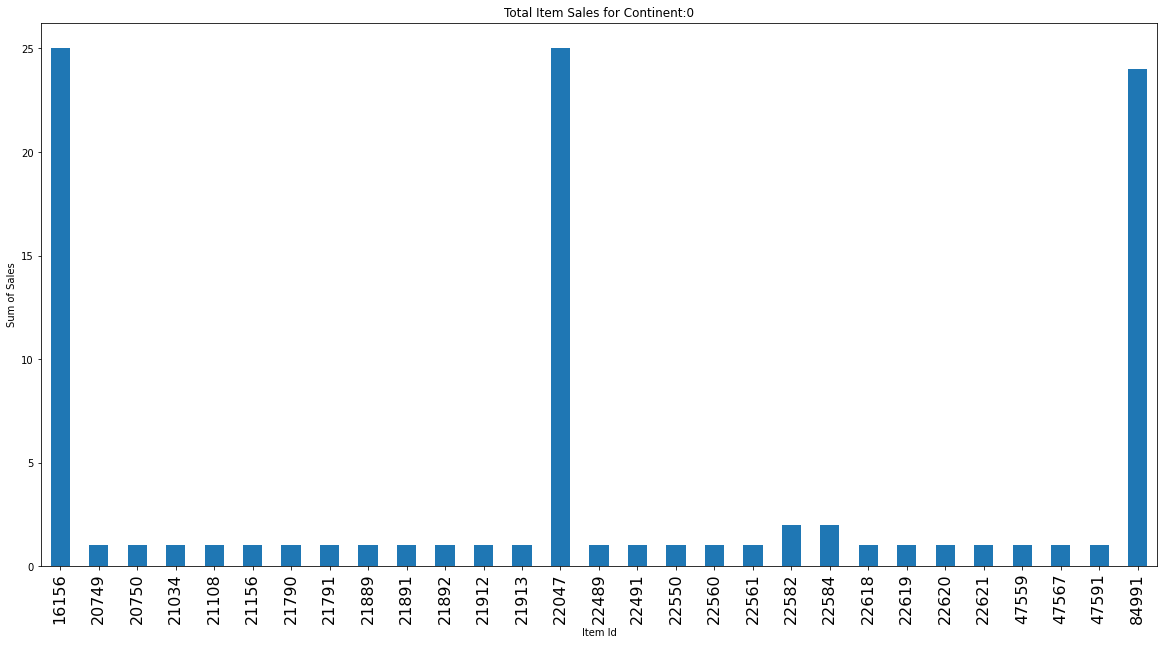

In [18]:
for i in data.Continent.unique():
    plt.figure(figsize=(20,10))
    item_sales_per_continent.loc[i,:].plot(kind= "bar")
    plt.xlabel("Item Id"),
    plt.ylabel("Sum of Sales")
    plt.title("Total Item Sales for Continent:{}".format(i))
    plt.xticks(fontsize=16, rotation=90)
    plt.show();

In [19]:
# A graph showing sales across continent

item_sales_per_continent_df= pd.DataFrame(data.groupby(['Continent', 'StockCode'])['Quantity'].sum())
item_sales_per_continent_df.reset_index(inplace=True)
item_sales_per_continent_df

,Continent,StockCode,Quantity
0,0,16156,25
1,0,20749,1
2,0,20750,1
3,0,21034,1
4,0,21108,1
...,...,...,...
6699,5,90059,6
6700,5,90098,4
6701,5,90120,4
6702,5,90145,2


In [30]:
#Sales Data Per Store

def total_sales_per_continent(data):
    sales_by_continent = data.groupby('Continent')['Quantity'].sum().reset_index()
    
    fig, ax = plt.subplots(figsize=(10,6))
    sns.barplot(sales_by_continent.Continent, sales_by_continent.Continent, order=sales_by_continent.sort_values('Quantity',ascending = False).Continent)
          
    ax.set(xlabel = "Continent", ylabel = "Sum of Quantity Sold", title = "Total Sales Per Continent")
    plt.xticks(fontsize=12, rotation=45)
       
    return sales_by_continent

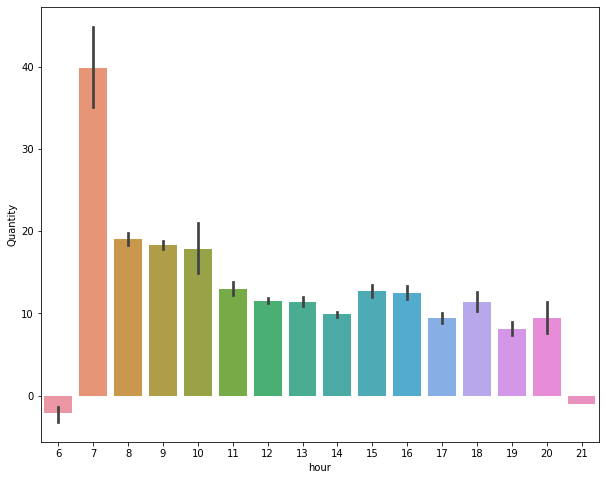

In [31]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['hour'], y=df['Quantity']);

In [23]:
# Make a copy of the data

df = data.copy()

In [24]:
# Extracting of the data features to drill down and get more insights    

df['date'] = pd.to_datetime(df['InvoiceDate'])
df['year'] = pd.DatetimeIndex(df['InvoiceDate']).year
#df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)
df['day_of_week'] = df['date'].apply(lambda x: x.dayofweek)
df['is_quarter_date'] = df['date'].apply(lambda x: x.quarter)
df["hour"] = df['date'].apply(lambda x: x.hour)
df.drop(['date'], axis=1, inplace=True)

In [25]:
# drop the invoice date after more important columns have been extracted

df.drop(['InvoiceDate'], axis=1, inplace=True)

In [26]:
# creating function to identify time of day: morning, afternoon, evening, night, etc.

def time_of_day(n):
    if n in range(4,8):
        return 'Early Morning'
    elif n in range(8,12):
        return 'Morning'
    elif n in range(12,18):
        return 'Afternoon'
    elif n in range(18,21):
        return 'Evening'
    elif n in range(21,25) or n==0:
        return 'Night'
    elif n in range(1,4):
        return 'Late Night'

In [27]:
# applying the function

df['Type_of_Day'] = df['hour'].apply(lambda x: time_of_day(x))

In [28]:
# a function for the seasons that exist in nigeria, classified into wet and ry season using the climatic information|

def month2seasons(x):
    if x in [1,2,3,4,5,6,7]:
        season = 'Dry'
    elif x in [8,9,10,11,12]:
        season = 'Wet'
    return season

df['Season'] = df['month'].apply(month2seasons)

In [29]:
# encoding the season data

df['Type_of_Day'].replace({'Afternoon': 0, 'Morning' : 1, 'Night':2, 'Evening':3, 'Early Morning':4, 'Late Night':5}, 
                          inplace=True)
df['Season'].replace({'Dry':0, 'Wet':1}, inplace=True)

In [32]:
# generating the test data from previous year historical data

test_data = df[df["month"]== 11 ]
test_data["year"]=test_data["year"].replace(2010,2011)

/var/folders/4g/1rtpcg7s7jd0t1rlzzd5xbz00000gn/T/ipykernel_25094/3750055114.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["year"]=test_data["year"].replace(2010,2011)


In [33]:
# splitting the data into train data and test data

train_data = df.copy()
test_data = test_data.copy()

print(f"No. of training examples: {train_data.shape[0]}")
print(f"No. of testing examples: {test_data.shape[0]}")

No. of training examples: 737977
No. of testing examples: 61291


In [35]:
# Extract the StockCode columns needed for submission file before dropping them in the train and test data

output = pd.DataFrame({"StockCode": test_data['StockCode'], "Description": test_data['Description']})

In [34]:
train_data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'Price',
       'Customer ID', 'Country', 'Continent', 'year', 'month', 'day',
       'day_of_week', 'is_quarter_date', 'hour', 'Type_of_Day', 'Season'],
      dtype='object')

In [37]:
# drop columns because they are categorical

train_data = train_data.drop(columns=['Country',"Description", "Invoice",'Continent', 'Price','Customer ID'])
test_data = test_data.drop(columns=['Country', "Invoice", "Description", "Quantity", 'Continent','Price','Customer ID'])

In [39]:
train_data.shape

(737977, 10)

In [40]:
#split train dataset into training and validation set
y = train_data['Quantity'].copy()
X = train_data.drop('Quantity', axis=1).copy()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso, LinearRegression
#from lightgbm import LGBMRegressor

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, train_size=0.7, random_state=42)

In [31]:
models = {
    '       Regressor' : LinearRegression()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

       Regressor trained.


In [44]:
# instantiate 
models = {
    'Linear Regression(Ridge)' : Ridge(),
    '           Random Forest' : RandomForestRegressor(),
    '                Catboost' : CatBoostRegressor(verbose=0),
    'Linear Regression(lasso)' : Lasso(),
    '       Linear Regression' : LinearRegression()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

Linear Regression(Ridge) trained.
           Random Forest trained.
                Catboost trained.
Linear Regression(lasso) trained.
       Linear Regression trained.


In [45]:
# function to calculate the RMSE 

def get_rmse(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_test - y_pred)**2))
    return rmse

In [47]:
# get RMSE score
for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = get_rmse(y_test, y_pred)
    print(name + ' RMSE: {:.2f}'.format(rmse))

Linear Regression(Ridge) RMSE: 174.71
           Random Forest RMSE: 267.57
                Catboost RMSE: 308.97
Linear Regression(lasso) RMSE: 174.72
       Linear Regression RMSE: 174.71


In [49]:
def mean_squared_error(true, pred):
    squared_error = np.square(true - pred) 
    sum_squared_error = np.sum(squared_error)
    mse_loss = sum_squared_error / true.size
    return mse_loss

In [50]:
# get RMSE score
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(name + ' MSE: {:.2f}'.format(mse))

Linear Regression(Ridge) MSE: 30522.17
           Random Forest MSE: 71595.72
                Catboost MSE: 95459.75
Linear Regression(lasso) MSE: 30525.81
       Linear Regression MSE: 30522.17


In [55]:
# testing with validation set
from sklearn.metrics import mean_squared_error as mse

reg = LinearRegression()
reg.fit(X_train, y_train)
reg_pred = reg.predict(X_test)
mse(y_test, reg_pred , squared=False)

174.705960784943

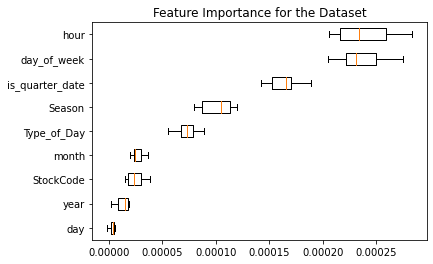

In [57]:
# check for important features

from sklearn.inspection import permutation_importance

result = permutation_importance(reg, X.values, y, n_repeats=10, random_state=42)

perm_imp_idx = result.importances_mean.argsort()

plt.boxplot(result.importances[perm_imp_idx].T, vert=False, labels=X.columns[perm_imp_idx])
plt.title('Feature Importance for the Dataset')

plt.show()

In [58]:
predicted_test = reg.predict(test_data)
predicted_test

/Users/mutiubusari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([17.90152039, 17.90158159, 17.3576833 , ..., 11.22615685,
       11.2278499 , 11.25302131])

In [59]:
test_data.shape

(61291, 9)

In [71]:
output.shape

(61291, 2)

In [104]:
vendease_sub['Quantity'] = vendease_sub['Quantity'].astype(int)
vendease_sub['Quantity']

0        17
1        17
2        17
3        17
4        17
         ..
61286    11
61287    11
61288    11
61289    11
61290    11
Name: Quantity, Length: 61291, dtype: int64

In [105]:
vendease_sub = pd.DataFrame(zip(output['StockCode'], output['Description'], predicted_test), columns = ['StockCode', 'Description','Quantity'])

In [106]:
vendease_sub

,StockCode,Description,Quantity
0,48184,DOORMAT ENGLISH ROSE,17.901520
1,48187,DOORMAT NEW ENGLAND,17.901582
2,21523,DOORMAT FANCY FONT HOME SWEET HOME,17.357683
3,22708,WRAP DOLLY GIRL,17.381855
4,22781,GUMBALL MAGAZINE RACK,17.383344
...,...,...,...
61286,21175,GIN + TONIC DIET METAL SIGN,11.227728
61287,21524,DOORMAT SPOTTY HOME SWEET HOME,11.234846
61288,21098,CHRISTMAS TOILET ROLL,11.226157
61289,21181,PLEASE ONE PERSON METAL SIGN,11.227850


In [124]:
sub1 = vendease_sub.groupby('StockCode')['Quantity'].sum().reset_index()
sub1f = sub1.sort_values(by=['Quantity'])
sub1f['Quantity'] = sub1f['Quantity'].round()
sub1f

,StockCode,Quantity
553,21476,6.0
633,21632,6.0
726,21750,6.0
1111,22275,6.0
1795,35909,6.0
...,...,...
1655,22865,3449.0
2233,84997,3560.0
2028,84029,3689.0
2299,85123,4866.0


In [125]:
sub2 = vendease_sub.groupby('Description')['Quantity'].sum().reset_index()
sub2f = sub2.sort_values(by=['Quantity'])
sub2f['Quantity'] = sub2f['Quantity'].round()
sub2f

,Description,Quantity
2541,STEEL SWEETHEART ROUND TABLE CREAM,6.0
2712,VINTAGE PINK DECORATIVE PARASOL,6.0
1393,LARGE SKULL WINDMILL,6.0
2750,WEEKEND BAG VINTAGE ROSE PAISLEY,6.0
1864,PINK FLOWERS RABBIT EASTER,6.0
...,...,...
2118,REGENCY CAKESTAND 3 TIER,3014.0
1194,HAND WARMER SCOTTY DOG DESIGN,3153.0
1753,PAPER CHAIN KIT 50'S CHRISTMAS,3326.0
1191,HAND WARMER OWL DESIGN,3449.0


In [126]:
final = pd.DataFrame(zip(sub1f['StockCode'], sub2f['Description'], sub1f['Quantity']), columns = ['StockCode', 'Description','Quantity'])
final

,StockCode,Description,Quantity
0,21476,STEEL SWEETHEART ROUND TABLE CREAM,6.0
1,21632,VINTAGE PINK DECORATIVE PARASOL,6.0
2,21750,LARGE SKULL WINDMILL,6.0
3,22275,WEEKEND BAG VINTAGE ROSE PAISLEY,6.0
4,35909,PINK FLOWERS RABBIT EASTER,6.0
...,...,...,...
2467,22865,BLACK/BLUE POLKADOT UMBRELLA,3449.0
2468,84997,CREAM SWEETHEART LETTER RACK,3560.0
2469,84029,SKULLS WRITING SET,3689.0
2470,85123,GLITTER CHRISTMAS STAR,4866.0


In [129]:
vendease_sub.to_csv('Vendease.csv', index=False)